In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm

from datasets import FashionMnistTrainDataset, FashionMnistTestDataset
from net import FashionMnistNet

In [2]:
ds_train = FashionMnistTrainDataset()
ds_test = FashionMnistTestDataset()

In [3]:
train_loader = DataLoader(ds_train, batch_size=1000, drop_last=False)
test_loader = DataLoader(ds_test, batch_size=1000, drop_last=False)

In [4]:
def plot_stats(train_loss_hist, test_loss_hist, train_accur_hist, test_accur_hist):
    fig, ax = plt.subplots(1, 2, figsize=(16,4))

    ax[0].plot(train_loss_hist, label='Train')
    ax[0].plot(test_loss_hist, label='Valid')
    ax[0].legend()
    ax[0].set_title('Loss History')

    ax[1].plot(train_accur_hist, label='Train')
    ax[1].plot(test_accur_hist, label='Valid')
    ax[1].legend()
    ax[1].set_title('Accuracy History')

In [20]:
net = FashionMnistNet()

In [21]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = net.to(device)

In [22]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(net.parameters())

In [23]:
train_loss_history, test_loss_history = [], []
train_accur_history, test_accur_history = [], []

for epoch in tqdm(range(10)):
    net.train()
    total_loss = 0
    total_correct = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optim.zero_grad()

        output = net(imgs)
        loss = loss_fn(output, labels)
        loss.backward()

        total_loss += loss.item()
        total_correct += (output.argmax(dim=1) == labels).sum().item()

        optim.step()

    train_loss_history.append(total_loss / len(train_loader))
    train_accur_history.append(total_correct / len(train_loader.dataset))

    net.eval()
    total_loss = 0
    total_correct = 0
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        output = net(imgs)
        loss = loss_fn(output, labels)

        total_loss += loss.item()
        total_correct += (output.argmax(dim=1) == labels).sum().item()

    test_loss_history.append(total_loss / len(test_loader))
    test_accur_history.append(total_correct / len(test_loader.dataset))

100%|██████████| 10/10 [00:04<00:00,  2.24it/s]


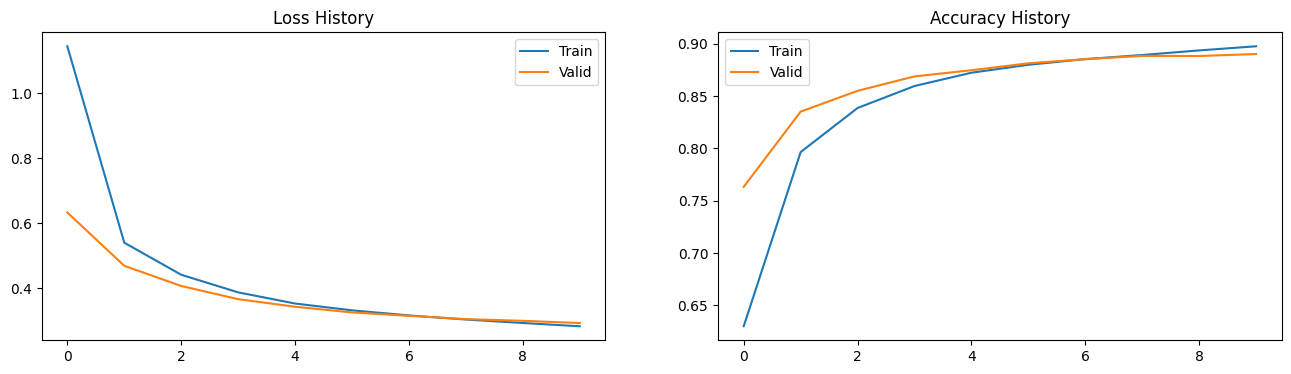

In [24]:
plot_stats(train_loss_history, test_loss_history, train_accur_history, test_accur_history)